$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

<font color="blue"> ARUN KUNNUMPURAM THOMAS </font>

#  Introduction

In this assignment we are going to do classification using different algorithms like Pocket algorithm, LDA, QDA and Logistic regression

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Input variables:
bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Source of the data

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [1232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1233]:
dfbank=pd.read_csv("bank-additional-full.csv",sep=";")
dfbank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1235]:
dfbank.shape

(41188, 21)

In [1236]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [1237]:
dfbank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1238]:
dfbank.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [1239]:
dfbank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1240]:
dfbank.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [1241]:
pd.isnull(dfbank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1242]:
np.any(dfbank.isnull())

False

In [1243]:
dfbank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [1244]:
dfbank['education']=np.where(dfbank['education'] =='basic.9y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.6y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.4y', 'Basic', dfbank['education'])

In [1245]:
dfbank['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [1246]:
#converting each categoraicals coloumns to numerical values using one hot encoding so that it can be used for classfication in future
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dfbank[cols]
data_dummies = pd.get_dummies(data_1)
result_dfbank = pd.concat([data_dummies, dfbank], axis=1)
result_dfbank.head()
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [1247]:
result_dfbank=result_dfbank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],axis=1)
result_dfbank.shape

(41188, 62)

In [1248]:
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [1249]:
result_dfbank['y'].unique()

array(['no', 'yes'], dtype=object)

In [1250]:
result_dfbank['y'] = result_dfbank['y'].apply(lambda x: 1 if x =='yes' else -1)

In [1251]:
result_dfbank['y'].unique()

array([-1,  1], dtype=int64)

In [1252]:
data_final_vars=result_dfbank.columns.values.tolist()
yy=['y']
XX=[i for i in data_final_vars if i not in yy]

In [834]:
colsRFE=['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']


In [1253]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(result_dfbank[colsRFE],result_dfbank['y'])
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False  True False False False
 False False False False  True False False False False False  True False
 False False False False False False False  True False  True  True  True
 False False  True  True  True False False False  True False False False
  True  True  True False False False False  True False False False  True
 False]
[13  1 28 41 38  1 31  6  1 16 15 40  8  9 10 42  1  2 39  3  4  5  1 22 44
 36 17 37 24 21 18  1 20  1  1  1 27 26  1  1  1 32 12 11  1 34 29  7  1  1
  1 35 33 14 43  1 19 23 25  1 30]


In [894]:
#  cols=['job_blue-collar','job_retired','job_student','education_Basic','default_no','contact_cellular','month_apr','month_aug', 'month_dec','month_mar', 'month_may','month_nov','day_of_week_mon', 'poutcome_failure','poutcome_nonexistent',
#        'poutcome_success','nr.employed','y']

In [ ]:
result_dfbank.columns.values

In [1254]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew=result_dfbank[cols]
result_dfbankNew.shape

(41188, 19)

In [985]:
# result_dfbankNew=result_dfbank[cols]
# result_dfbankNew.shape

(41188, 19)

In [1255]:
result_dfbankNew['y'].unique()

array([-1,  1], dtype=int64)

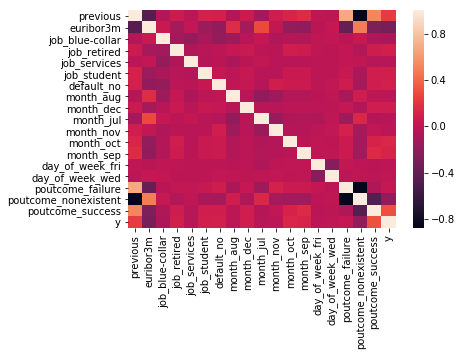

In [1256]:
import seaborn as sns
corr = result_dfbankNew.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [1257]:
cols=["euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew1=result_dfbank[cols]
result_dfbankNew1.shape

(41188, 18)

In [842]:
# result_dfbankNew1=result_dfbank[cols]
# result_dfbankNew1.shape

(41188, 18)

# Visualization of the Data

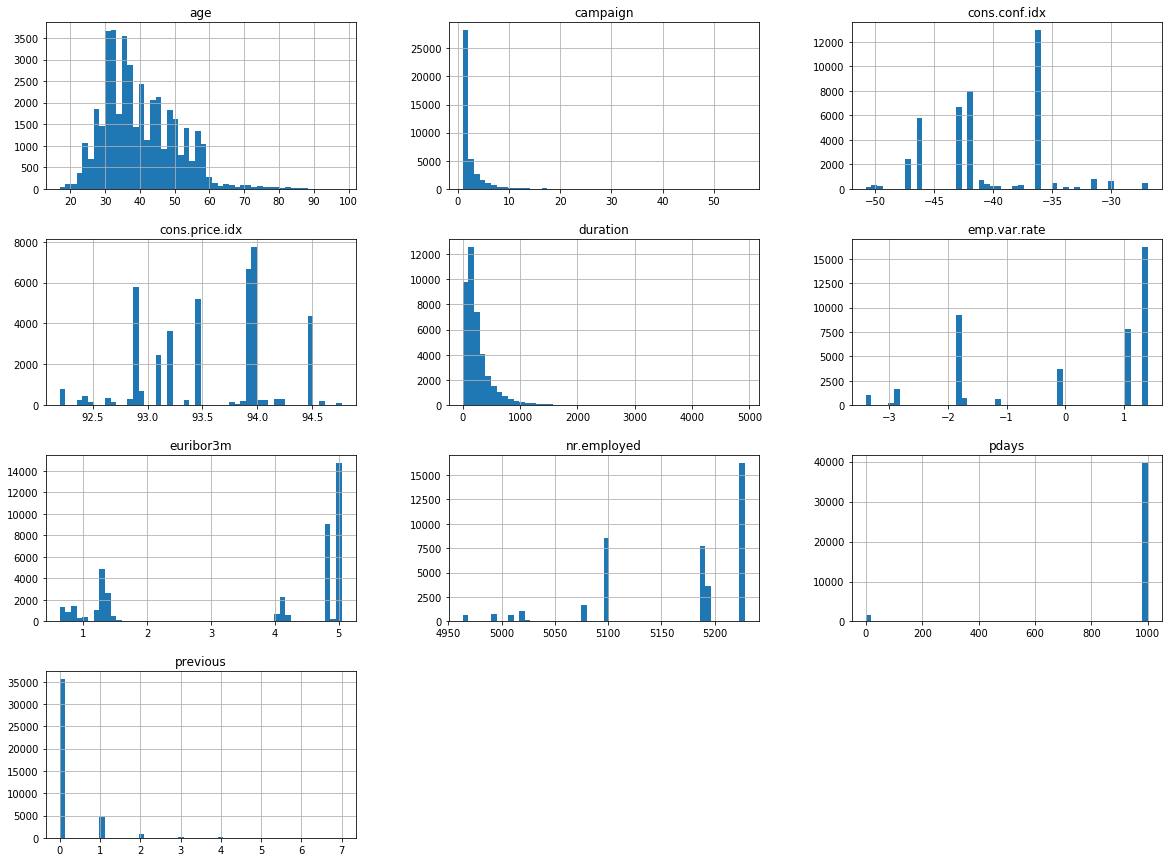

In [1258]:
#histogram for continous attributes
dfbank.hist(bins=50, figsize=(20,15))
plt.show()

In [1260]:
dfbank['education'].dtype

dtype('O')

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


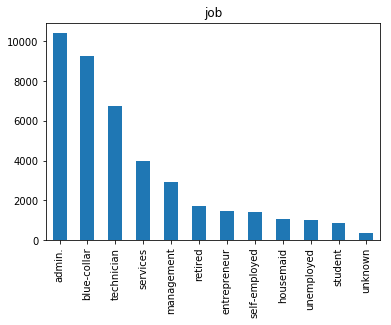

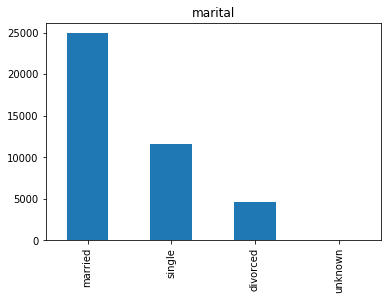

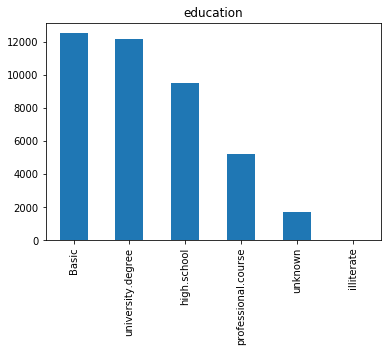

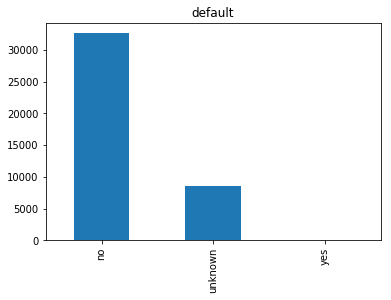

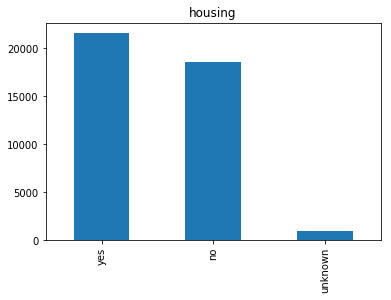

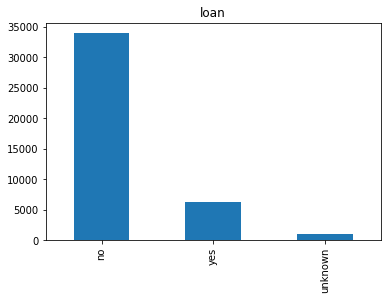

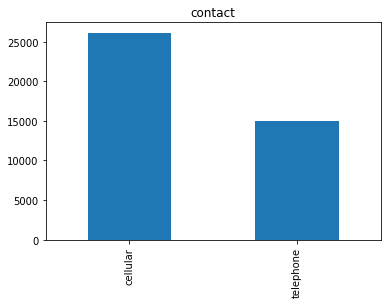

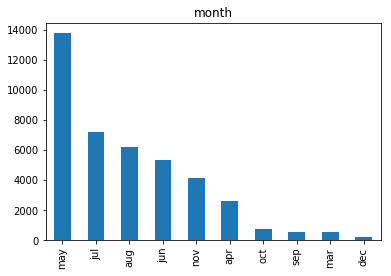

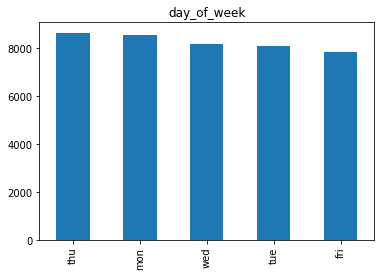

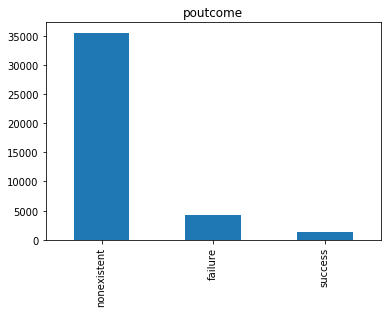

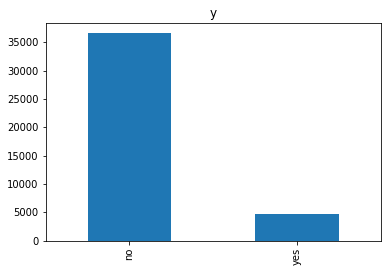

In [1259]:
#bar graph for categorical variables
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in dfbank.columns:
    if dfbank[i].dtype is np.dtype('O'):
        print(i)
        plt.subplots(1,1)
        dfbank[i].value_counts().plot(kind='bar',subplots='true')
fig.tight_layout()

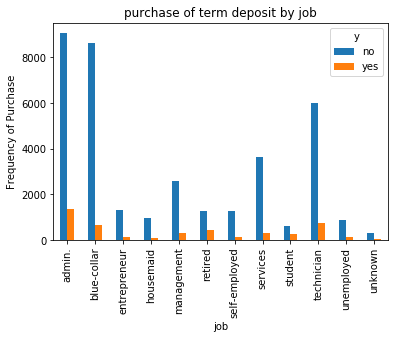

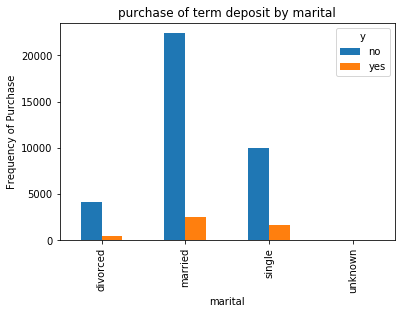

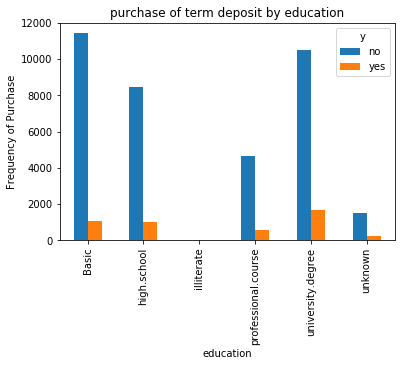

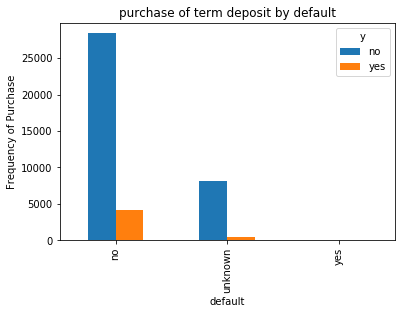

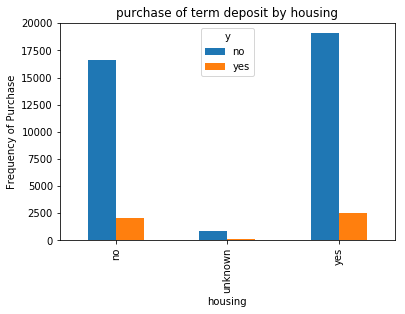

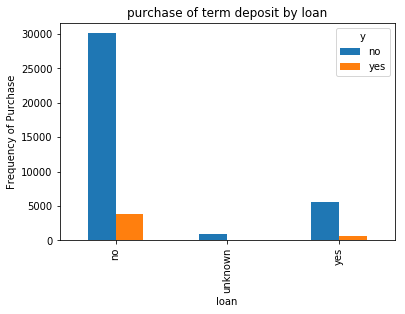

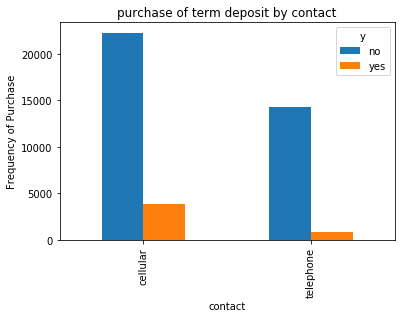

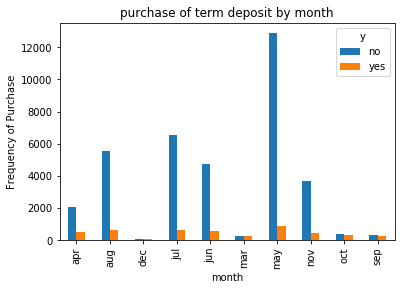

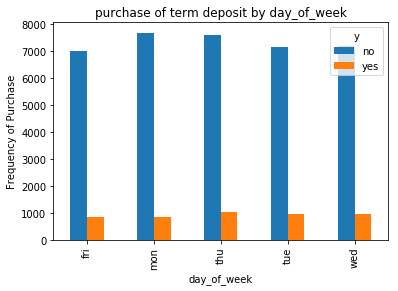

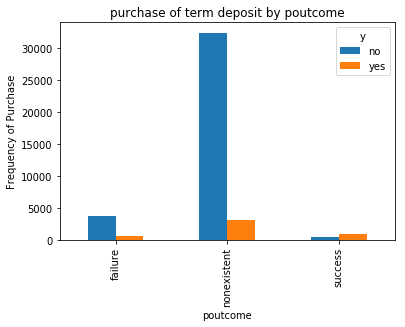

In [1261]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
for i in cols:
    pd.crosstab(dfbank[i],dfbank.y).plot(kind='bar')
    plt.title('purchase of term deposit by '+i)
    plt.xlabel(i)
    plt.ylabel('Frequency of Purchase') 

The average age of people who buy term deposit is higher than the Avg age of people who don't buy term deposit. If the campaign (number of contacts performed during this campaign and for this client) is less than more people bought term deposit If the days (number of days that passed by after the client was last contacted from a previous campaign) are less than more people bought term deposit. From the purchase of term deposit by job graph shows the job title can be a good predictor for deciding whether one of the term deposit or not It seems the marital and education also be good predicators
for deciding whether one buys term deposit or not. But day of the week is not a predictor for deciding one who will buy term deposit or not. Month will be a good predictor. It seems all categorical variable except day of week will help us to predict the whether a user by term deposit or not

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X=scaler.fit_transform(X)
#X

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Classs Definition

Base Model is the parent class here, which has two abstract method train and use. Classifier inherits the Base Model and it has Method like __init__ for initializing the variables, normalize for normalizing the train and test data, add_ones is used to add basis to features.

In [1262]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        self.w = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = X-self.meanX/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


Perceptron algorithm iterate over the training examples, and update the weights in a way that would result in correct classification.

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. To overcome this issue we are using Pocket alogorithm.To overcome the unstability of the previous algorithm, the pocket algorithm keeps the best solution so far in its pocket. Thus,  wpocket   will contain the best solution so far.

In [1263]:
from copy import deepcopy as copy
class PocketAlgorithm(Classifier): 
   
    def __init__(self, alpha,maxiter):
        Classifier.__init__(self)
        self.maxiter = maxiter
        self.alpha=alpha
    
    # return 1 if w is better -1 if wp is better
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
    
    def train(self, X, T):
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        N=X.shape[0]
        for i in range(self.maxiter):
            print("running",i)
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
            ##### additional for pocket algorithm 
                if self.compare(X, T, self.w, self.w_pocket) > 0: 
                    self.w_pocket[:] =self.w[:]
    
            if converged:
                print("converged at ", i)
                break
  
 
    def use(self, X):
        y= np.sign(X @ self.w_pocket)
        return y
        
        

# Explanation of Pocket Algorithm code

PocketAlgorithm is a class created for implementing the pocket algorithm. It has __init__,train and use method. init method  is used
to initialize the maxiter and alpha , train method is used to find the weight(w_pocket) based on the train dataset and use method
will predict the value for test data. In this train method is update weight only if the compare method returns 1. That means 
if the newly calculated w value is better than w_pocket then only it will update weight. It will store the best weight in wpocket


### C. QDA

When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

By deriving, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $\xv$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

In [1265]:
from copy import deepcopy as copy
class QDA(Classifier): 
   
    
    def __init__(self):
        Classifier.__init__(self)
        self.Xs=None
        self.mu1=None
        self.mu2=None
        self.Sigma1=None
        self.Sigma2=None
        self.N=None
        self.N1=None
        self.N2=None
        self.prior1=None
        self.prior2=None
        self.d11=None
        self.d22=None
    
    
    
    
    def QDAFun(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
        
    
    def train(self, X, T):
        self.meanX, self.stdX = np.mean(X, 0), np.std(X, 0)
        self.Xs = (X - self.meanX) / self.stdX
        self.mu1=np.mean(self.Xs[T==1],0)
        self.mu2=np.mean(self.Xs[T==-1],0)
        self.Sigma1 = np.cov(self.Xs[T==1].T)
        self.Sigma2 = np.cov(self.Xs[T==-1].T)
        self.N=self.Xs.shape[0]
        self.N1=self.Xs[T==1].shape[0]
        self.N2=self.Xs[T==-1].shape[0]
        self.prior1 = self.N1 /self.N
        self.prior2 = self.N2 /self.N
  
 
    def use(self, X):
        self.XtestS = (X-self.meanX)/self.stdX
        d1 = self.QDAFun(self.XtestS, self.mu1, self.Sigma1, self.prior1)
        d2 = self.QDAFun(self.XtestS, self.mu2, self.Sigma2, self.prior2) 
        self.d11=d1
        self.d22=d2
        #print(d1)
        #print(d2)
       # d=np.vstack((d1,d2)).T
        d=np.column_stack((d1,d2))
        print(d.shape)
                          
        dargmax=np.argmax(d,axis=1)
        print(dargmax)
        print(np.unique(dargmax))
        dargmax[dargmax==1]=-1
        dargmax[dargmax==0]=1
        
        print(np.unique(dargmax))
        #print(d)
        return dargmax
        

Class QDA is used to implement QDA algorithm. It has __init__, QDAFun, train and use method. __init__ used to initialize the Variables and train method will find mea, sigma, prior for each label. Use method uses the QDAFun method to the indicator of the probability Of each record set of test data for each label. Using argmax method I am returning the predicted label by taking the largest value from d1 and d2

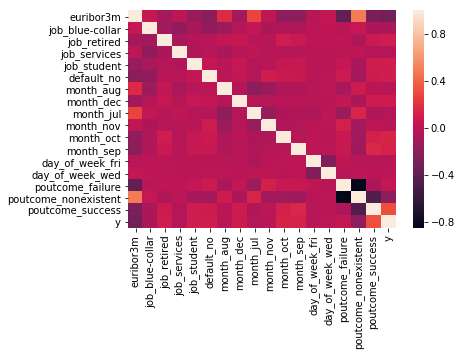

In [1266]:
import seaborn as sns
corr = result_dfbankNew1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### D. LDA

Maintaining the covariance matrix is not cheap. Considering the input dimension $d$, the symmetric covariance meetric contains $\frac{d (d+1)}{2}$. 

Also, the data is undersampled, the resulting class boundary has high chance of overfitting. 

Simply using the same covariance for all the classes, we can reach the **linear discriminant analysis** model, which can overcome the stated problems above. 
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\
\\
-\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) &> -\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)\\
\\
 - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) &>  - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)\\ 
 \\
 - \frac{1}{2} \Big[ \xv^\top \boldsymbol\Sigma^{-1}\xv  -2 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ +  \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ \Big] + \ln P(T = +1) &>  - \frac{1}{2} \Big[ \xv^\top \boldsymbol\Sigma^{-1}\xv  -2 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- +  \boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_- \Big] + \ln P(T = -1)\\
 \\
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$



In [1267]:
from copy import deepcopy as copy
class LDA(Classifier): 
   
    
    def __init__(self):
       
        Classifier.__init__(self)
        self.Xs=None
        self.mu1=None
        self.mu2=None
        self.Sigma=None
        self.N=None
        self.N1=None
        self.N2=None
        self.prior1=None
        self.prior2=None
        self.d11=None
        self.d22=None

        
    
    def LDAFun(self,X, mu, sigma, prior):
        
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu - 0.5 * np.dot(mu, sigma_inv) * mu + np.log(prior), axis=1)
    
     
    def train(self, X, T):
        self.meanX, self.stdX = np.mean(X, 0), np.std(X, 0)
        self.Xs = (X - self.meanX) / self.stdX
        self.mu1=np.mean(self.Xs[T==1],0)
        self.mu2=np.mean(self.Xs[T==-1],0)
        self.Sigma = np.cov(self.Xs.T)
        self.N=self.Xs.shape[0]
        self.N1=self.Xs[T==1].shape[0]
        self.N2=self.Xs[T==-1].shape[0]
        self.prior1 = self.N1 /self.N
        self.prior2 = self.N2 /self.N   

 
    def use(self, X):
        
        
        self.XtestS = (X-self.meanX)/self.stdX
        d1 = self.LDAFun(self.XtestS, self.mu1, self.Sigma, self.prior1)
        d2 = self.LDAFun(self.XtestS, self.mu2, self.Sigma, self.prior2)
        self.d11=d1
        self.d22=d2
        d=np.column_stack((d1,d2))
        print(d.shape)                  
        dargmax=np.argmax(d,axis=1)
        print(dargmax)
        print(np.unique(dargmax))
        dargmax[dargmax==1]=-1
        dargmax[dargmax==0]=1
        print(np.unique(dargmax))
        #print(d)
        return dargmax
        

Class LDA is used to implement the LDA algorithm. It has __init__, LDAFun, train and use methods. __init__ used to initialize Variables. The train method used to find meaning for all classes, Sigma and prior for each class. Use method uses LDAFun to find the indicator Of probability for each class for each record in test dataset and it will return the predicted label based on the largest value of d1 and d2

### E. Logistic Regression

Previously we discussed about using least squres to fit on the discrete target for classification.
When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. 

Now, we consider a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = y.
$$


# Target

To generate multiple probability outputs for each class, we consider the indicator output targets. 

$$
\Tm = \begin{bmatrix}
        t_{1,1} & t_{1,2} & \cdots & t_{1, K} \\
        t_{2,1} & t_{2,2} & \cdots & t_{2, K} \\
        \vdots & & &     \vdots \\
        t_{N,1} & t_{N,2} & \cdots & t_{N, K} \\
      \end{bmatrix}
$$
where $t_{n,k}$ is 0 or 1 with only one 1 per each row. 

Note: Here the weight $\wv$ is not a vector any more. It is matrix with $D+1 \times K$ dimensions. 

# Likelihood

Assuming i.i.d (independently identically distributed) data, we can compute the likelihood as

$$
P(\Tm \mid \wv) = \prod_{n=1}^{N} \prod_{k=1}^{K} P(T = k \mid x_n)^{t_{n,k}} = \prod_{n=1}^{N} \prod_{k=1}^{K} y_{n,k}^{t_{n,k}}
$$

Since we maximize the likelihood function, we define our error function as the negative logarithm of it:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

This function is called *cross-entropy* error function for the multiclass classification problem. 



# Gradient Descent

As we practiced in least mean squares, we need to update the weight $\wv$ with the gradient:

$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$
with the learning rate $\alpha$. 


## Softmax Transformation

Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid \xv)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

To ensure this,

$$
P(T=k \mid \xv) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$

Since we are working with the logarithm, an exponent is a good idea.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$


## Back to Derivative

Here, 

$$
\begin{align*}
\nabla_{\wv_j} g_{n,k}(\xv) &= g_k(\xv) (I_{kj} - g_j(\xv)) \nabla_{\wv_j} (\wv^\top \xv) \\
    \\
            &= g_k(\xv) (I_{kj} - g_j(\xv))  \xv.
\end{align*}
$$


$$
\begin{align*}
\nabla_{\wv_j} E(\wv) &= \nabla_{\wv_j} \Big(-\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln g_{n,k}(\xv_n) \Big) \\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \nabla_{\wv_j} g_{n,k}(\xv_n)\\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(\xv_n)) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(\xv_n)) \Bigg) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} I_{kj} - g_j(\xv_n) \sum_{k=1}^{K} t_{n,k} ) \Bigg) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg(  t_{n,j} - g_j(\xv_n)\Bigg) \xv_n
\end{align*}
$$

Using the gradient, now we can update the weights, 

$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

Converting the summation into matrix calculation,

$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


In [1268]:
from copy import deepcopy as copy
class LogisiticRegression(Classifier): 
    def __init__(self,niter,alpha):
        Classifier.__init__(self)
        self.Xs=None
        self.meanX=None
        self.stdX=None
        self.niter = niter
        self.alpha = alpha
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        #self.meanX, self.stdX = np.mean(X, 0), np.std(X, 0)
        #self.Xs = (X - self.meanX) / self.stdX
        
        #X1=self.add_ones(self.Xs)
        X1 = self.add_ones(X)
        self.w = np.random.rand(X1.shape[1], 2)
        for step in range(self.niter):
            # TODO: add training code here! 
            ys =self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T-ys) 
        print(self.w)   
    
    def use(self, X):
        #self.XtestS = (X-self.meanX)/self.stdX
        self.XtestS=self.add_ones(X)
        y= self.g(self.XtestS, self.w) 
        dargmax=np.argmax(y,axis=1)
        dargmax[dargmax==1]=1
        dargmax[dargmax==0]=-1
        return dargmax
        
        

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

#  Partitioning dataset

In [1269]:
cols=["euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
# cols=['job_blue-collar','job_retired','job_student','education_Basic','default_no','contact_cellular','month_apr','month_aug', 'month_dec','month_mar', 'month_may','month_nov','day_of_week_mon', 'poutcome_failure','poutcome_nonexistent',
#        'poutcome_success','nr.employed']
X=result_dfbankNew1[cols]
y=result_dfbankNew1['y']
X=X.values
y=y.values

In [1270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Usage of Pocket Algorithm

In [1271]:
pa = PocketAlgorithm(0.001,10)
#nXLs=ls.add_ones(nX)
pa.train(X_train,y_train)
#plt.plot(Tlog, 'ob')
ypocket=pa.use(X_test)
#plt.plot(pa.use(X_train))

running 0
running 1
running 2
running 3
running 4
running 5
running 6
running 7
running 8
running 9


In [1272]:
np.unique(ypocket)

array([-1.,  1.])

# Usage of QDA Algorithm

In [1274]:
qdaobj = QDA()
#nXLs=ls.add_ones(nX)
qdaobj.train(X_train,y_train)
#plt.plot(Tlog, 'ob')
yqda=qdaobj.use(X_test)
np.unique(yqda)

(8238, 2)
[1 1 1 ..., 1 1 1]
[0 1]
[-1  1]


array([-1,  1], dtype=int64)

# Usage of LDA Algorithm

In [1275]:
ldaobj = LDA()
#nXLs=ls.add_ones(nX)
ldaobj.train(X_train,y_train)
ylda=ldaobj.use(X_test)
np.unique(ylda)


(8238, 2)
[1 1 1 ..., 1 1 1]
[1]
[-1]


array([-1], dtype=int64)

# Usage of Logistic Regression

In [1273]:
logObj = LogisiticRegression(1000,0.0001)
#nXLs=ls.add_ones(nX)
yfinal = np.zeros((X_train.shape[0], 2))
yfinal[:,0] = y_train == -1
yfinal[:,1] = y_train == 1
logObj.train(X_train,yfinal)
ylog=logObj.use(X_test)
np.unique(ylog)
np.sum(ylog==1)

[[ 0.59852729  1.08685343]
 [ 1.09299918  0.78795394]
 [ 0.37986256 -0.03155833]
 [ 0.34118371  0.8116479 ]
 [ 0.85286351  0.48429716]
 [-0.09635393  0.46890274]
 [ 0.19620958  0.43342028]
 [ 0.4223511   0.95413537]
 [ 0.06621439  1.0866897 ]
 [-0.12189958  0.79905543]
 [ 0.65381069  1.03035533]
 [ 0.32054052  1.37113492]
 [ 0.41563744  1.11452129]
 [ 0.21571368  0.12059463]
 [ 0.4763973   0.57572842]
 [ 0.70833915 -0.61444198]
 [ 0.6892963  -0.08262   ]
 [-0.32559378  1.83459409]]


734

# Classification results

In [1027]:
#pocket algorithm

In [1276]:
ypocket

array([-1., -1., -1., ..., -1., -1., -1.])

In [ ]:
#QDA

In [1277]:
yqda

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [ ]:
#LDA

In [1278]:
ylda

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [ ]:
#Logistic regression

In [1279]:
ylog

array([-1, -1, -1, ...,  1, -1,  1], dtype=int64)

# Plots of classification results

# Pocket algorithm

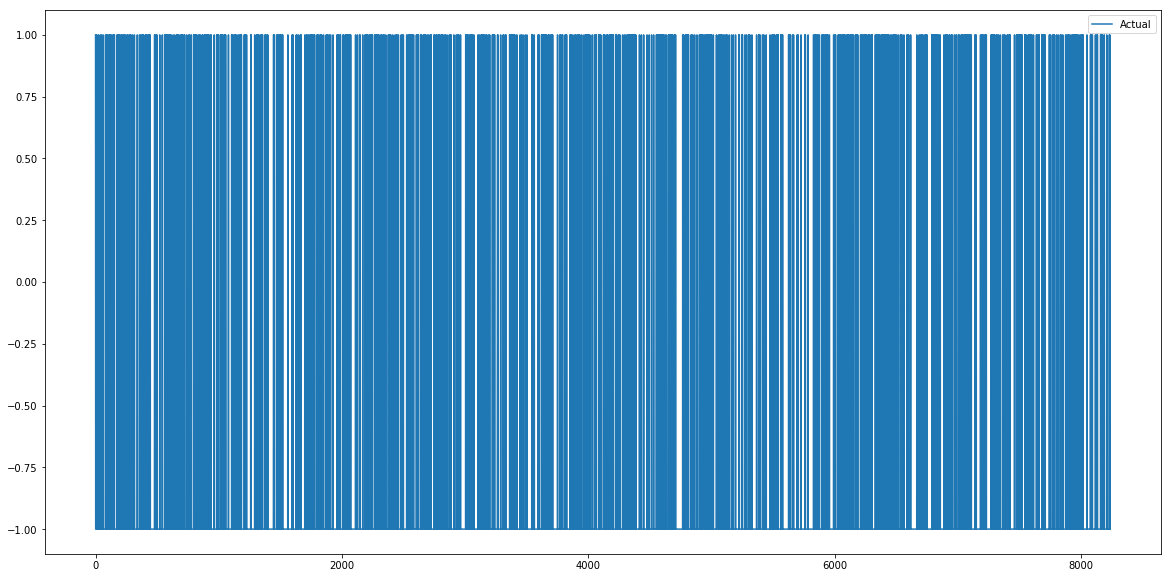

In [1280]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual')
plt.legend()

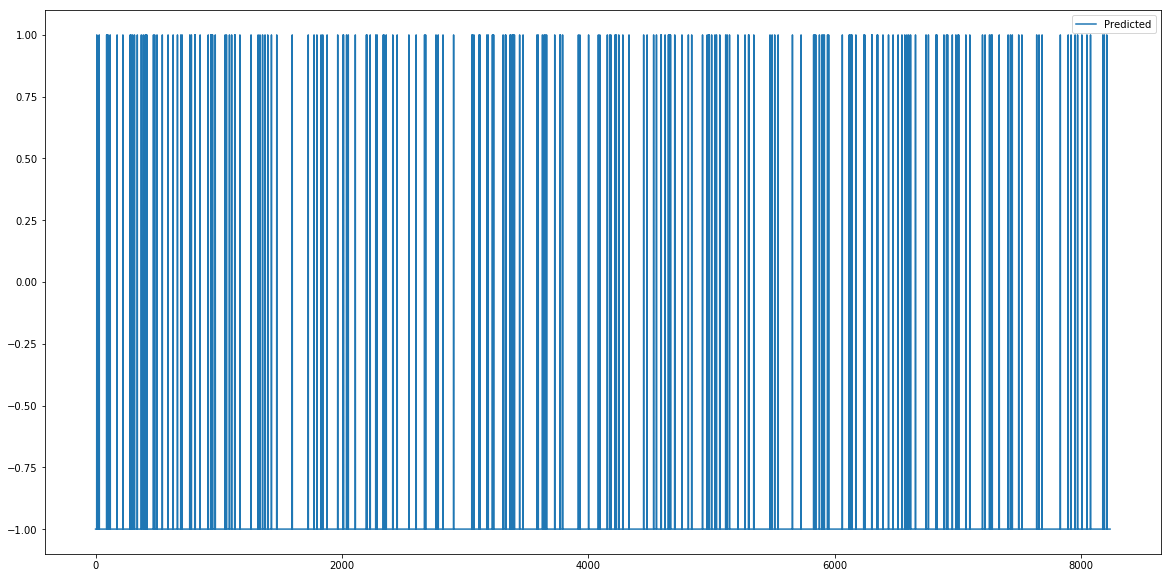

In [1281]:
plt.figure(figsize=(20, 10))
plt.plot(ypocket, label='Predicted')
plt.legend()

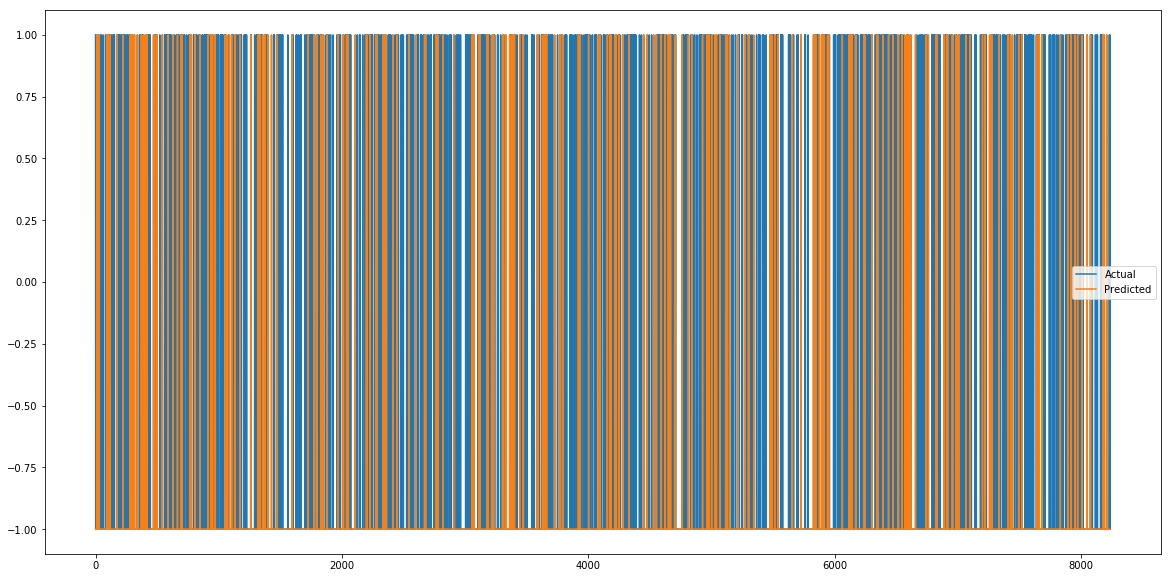

In [1282]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual')
plt.plot(ypocket, label='Predicted')
plt.legend()
plt.show()

# QDA algorithm

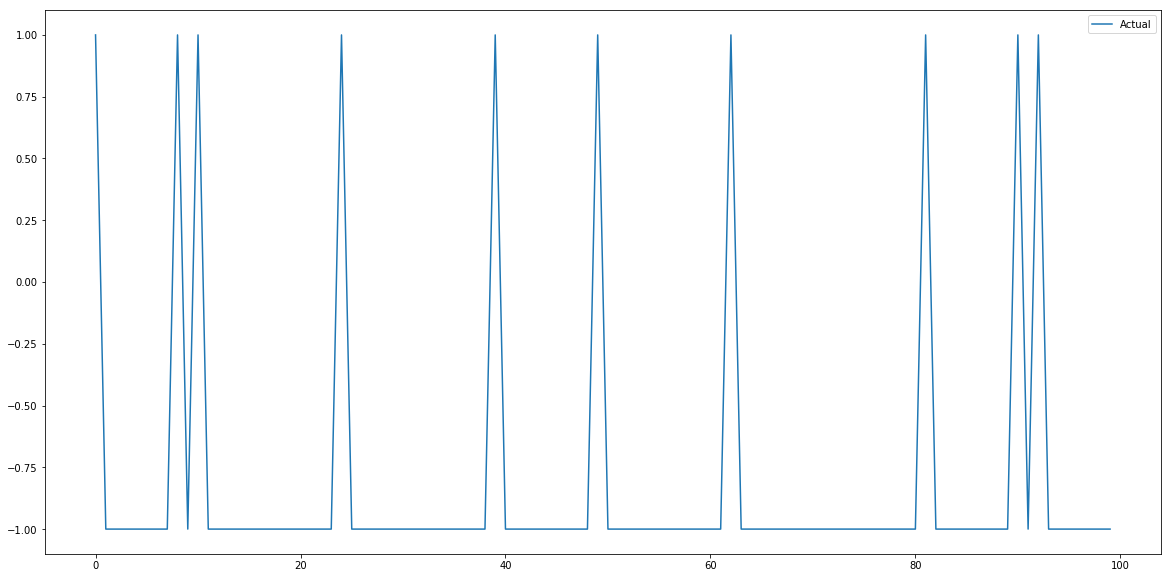

In [1283]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.legend()

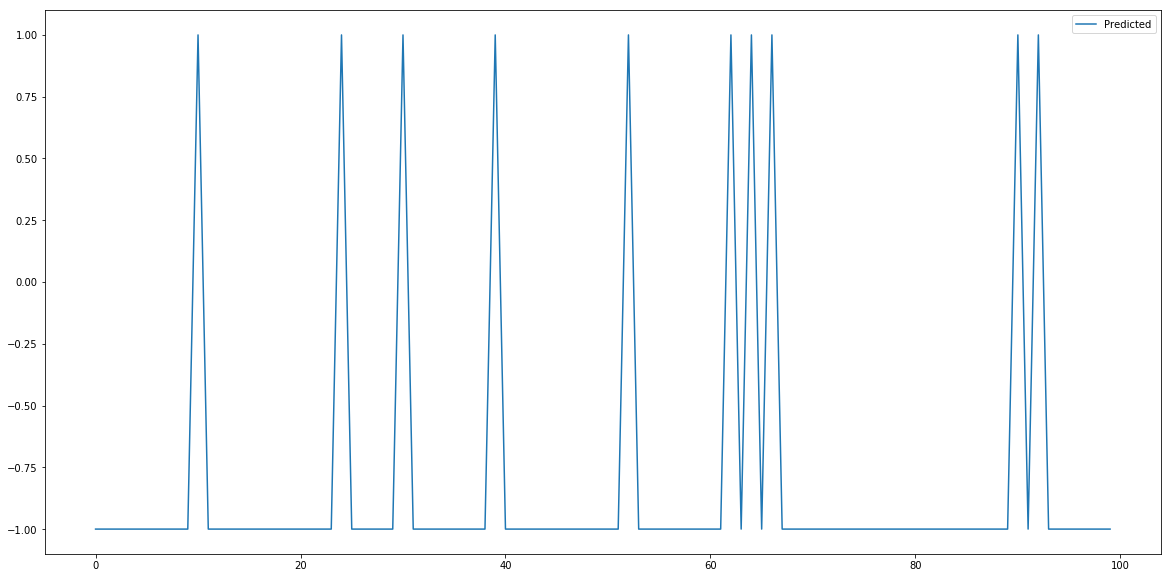

In [1284]:
plt.figure(figsize=(20, 10))
plt.plot(yqda[:100], label='Predicted')
plt.legend()

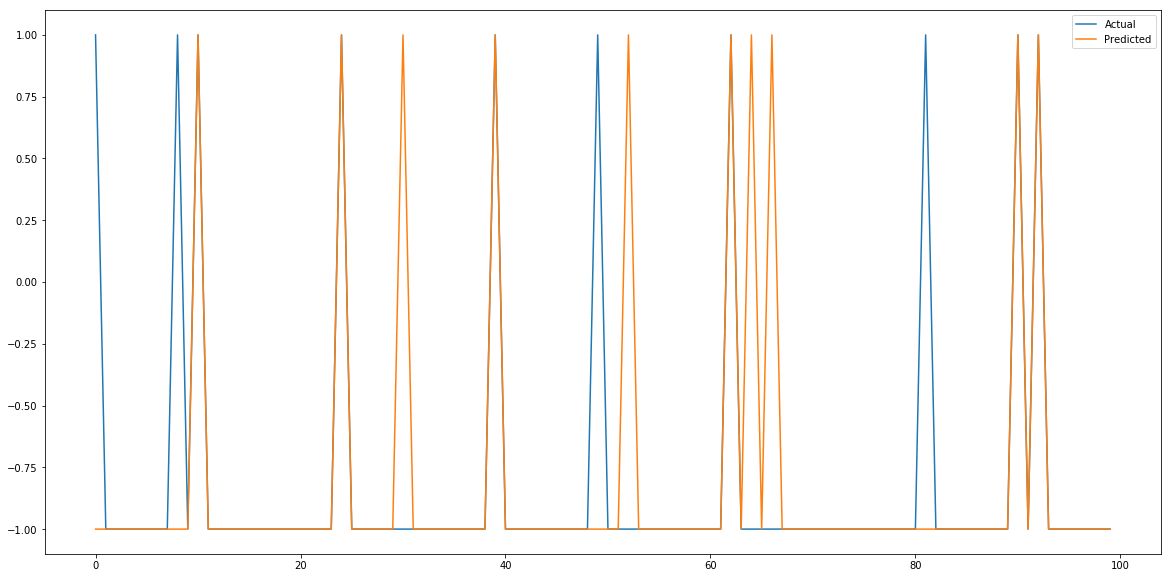

In [1285]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.plot(yqda[:100], label='Predicted')
plt.legend()
plt.show()

In [1159]:
qdaobj.d11

array([ 3.53752495,  6.0749107 ,  4.77516236, ...,  2.52159598,
        5.97736057,  5.64736601])

In [1286]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0.92,'QDA Discriminant Functions')

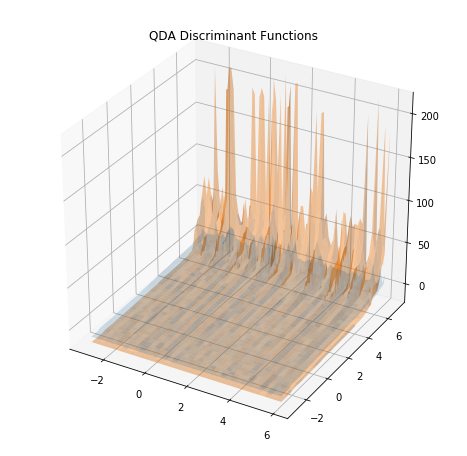

In [1287]:
xs, ys = np.meshgrid(np.linspace(-3,6, 80), np.linspace(-3,7, 80))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *qdaobj.d11[:6400].reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *qdaobj.d22[:6400].reshape(xs.shape),0), alpha=0.4)


plt.title("QDA Discriminant Functions")

Text(0.5,1,'Decision Boundary')

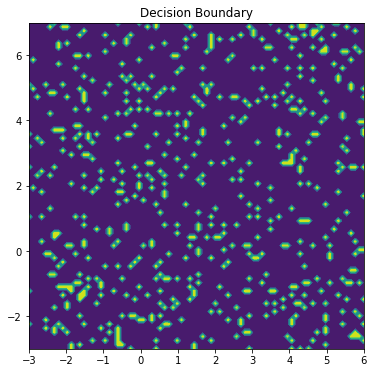

In [1288]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (qdaobj.d11[:6400]-qdaobj.d22[:6400] > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# LDA

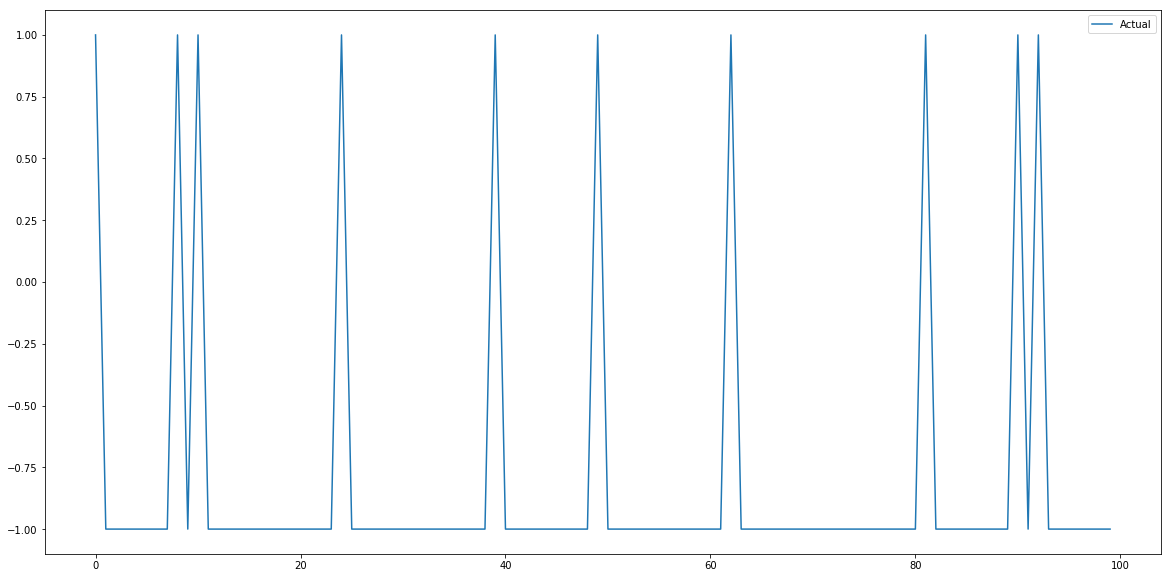

In [1289]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.legend()

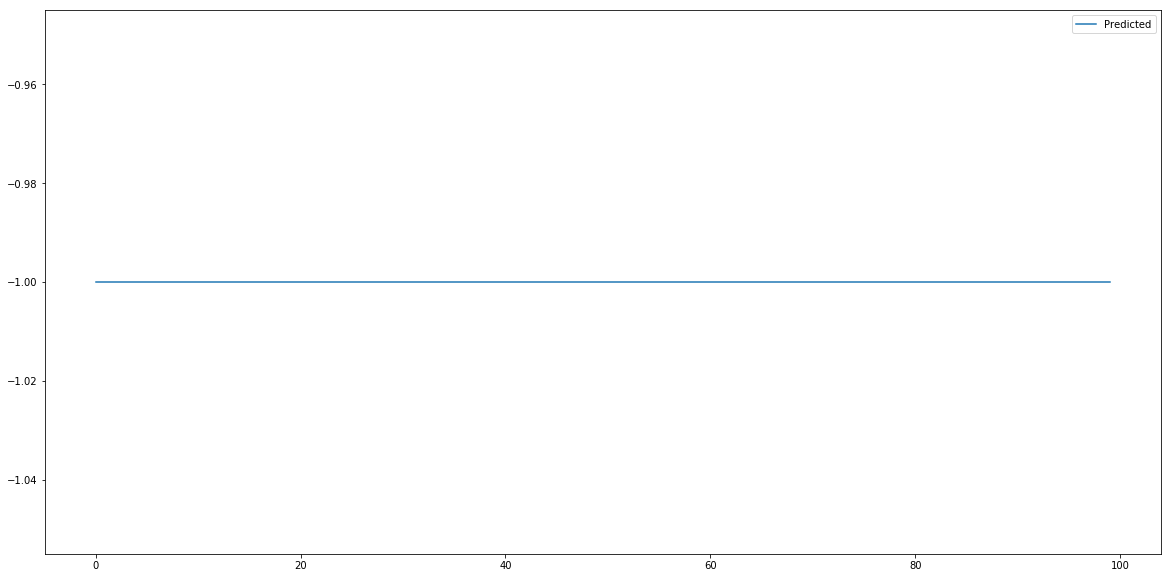

In [1290]:
plt.figure(figsize=(20, 10))
plt.plot(ylda[:100], label='Predicted')
plt.legend()

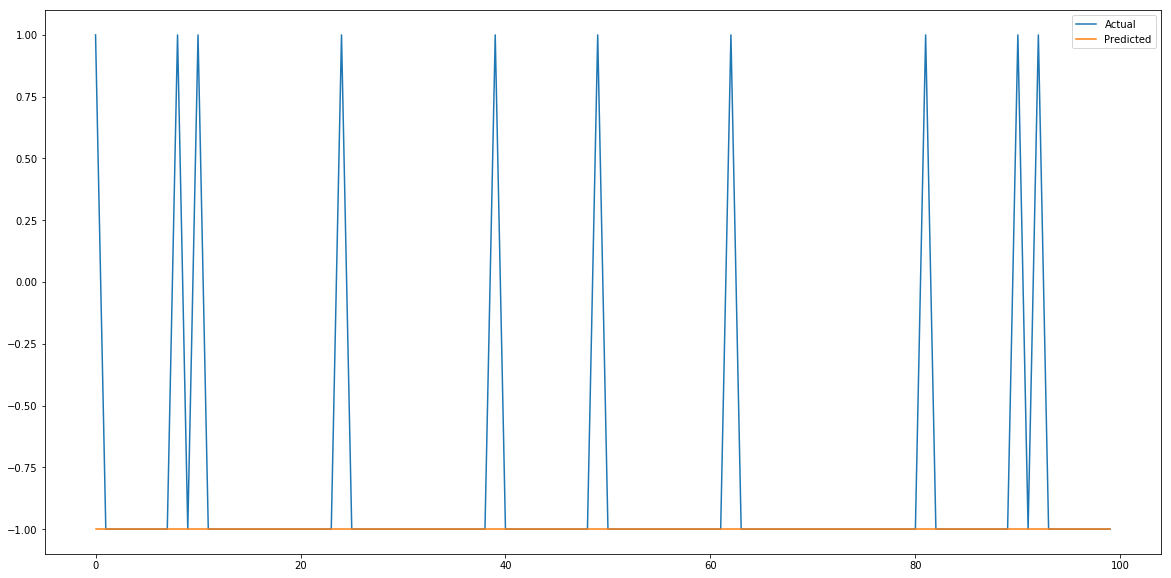

In [1291]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.plot(ylda[:100], label='Predicted')
plt.legend()
plt.show()

Text(0.5,0.92,'LDA Discriminant Functions')

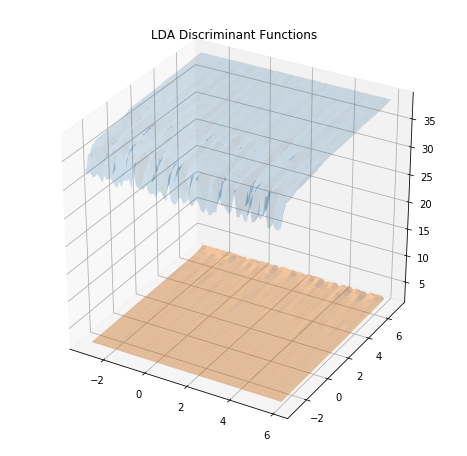

In [1292]:
xs, ys = np.meshgrid(np.linspace(-3,6, 80), np.linspace(-3,7, 80))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *ldaobj.d11[:6400].reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *ldaobj.d22[:6400].reshape(xs.shape),0), alpha=0.4)


plt.title("LDA Discriminant Functions")

Text(0.5,1,'Decision Boundary')

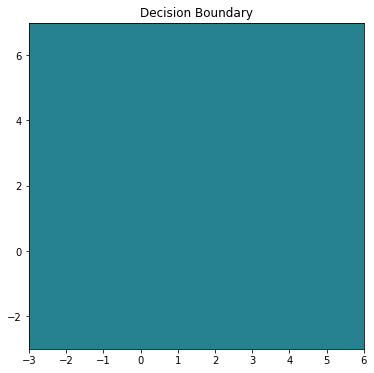

In [1293]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (ldaobj.d11[:6400]-ldaobj.d22[:6400] > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# logistic regression

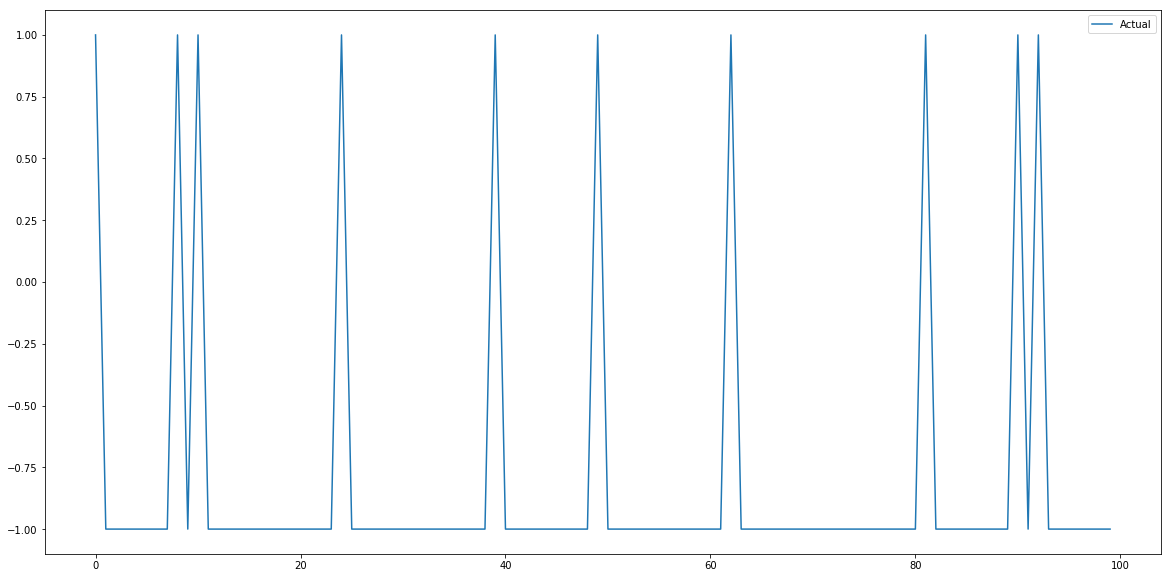

In [1294]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.legend()

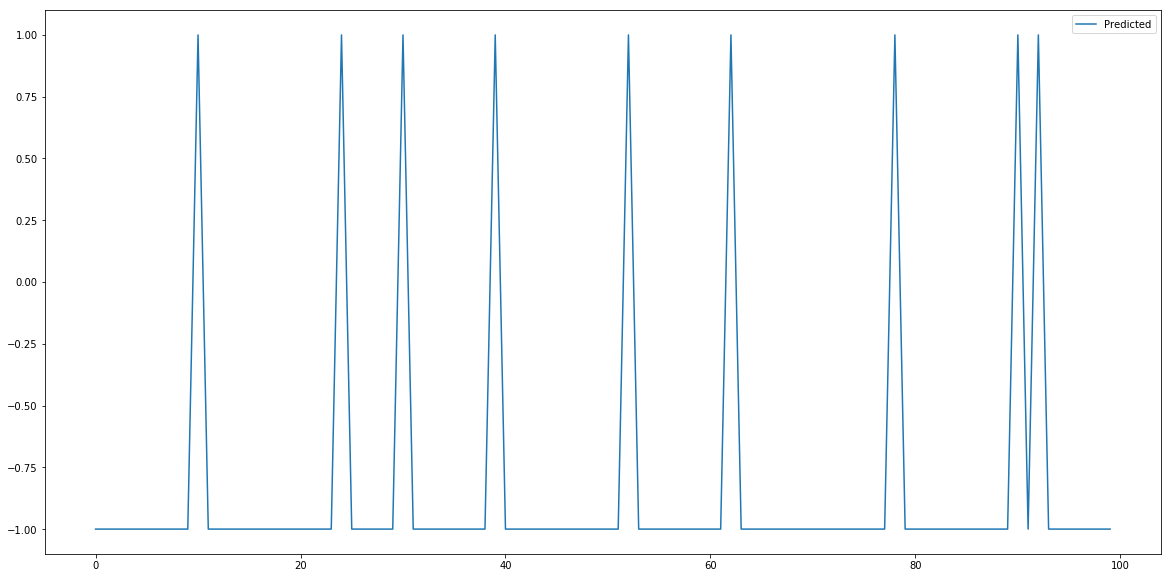

In [1295]:
plt.figure(figsize=(20, 10))
plt.plot(ylog[:100], label='Predicted')
plt.legend()

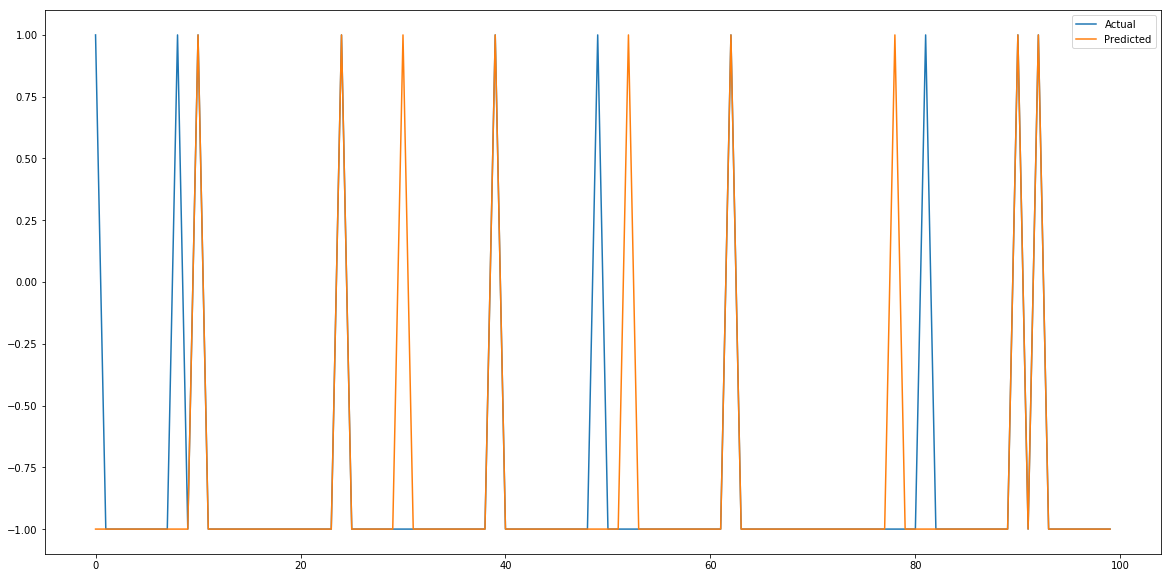

In [1296]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.plot(ylog[:100], label='Predicted')
plt.legend()
plt.show()

# model comparision and evaluation metrics

# Measurements

How to evaluate a machine learning model is critical for the choice of right tools and performance. For various reason, there are several classification measurements to meet different needs for practical applications. 
In this section, we examine popular measures. 

One naive evaluation we can think of is the rate or percentage or correct classification. 
That is, when there are 1000 target lables to classify, if 950 are correctly classified, we can say 95% accuracy: 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

This measure, however, can be uninformative, especially when the importance of each class is different. 
As in our previous discussion about imbalance of data samples, sometimes we need to care more a specific class.
For this, confusion matrix lists all the counts for all classes. 

## Confusion Matrix

Here is an example confusion matrix. 

 | - | + 
 --|--|--
 - | 439 | 28
 + | 22 | 511
 
 <center>Table 1. Example Confusion Matrix </center>
 
 Here, each row represents the predictions from model and column represents the actual classes.
 So, we can read this that for negative samples, 439 samples are correctly classified while 511 samples are correctly classified for positive data. Overall the accuracy is 95% but with confusion matrix we have more information about the classification results. 





| - | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)


## Precision and Recall

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$


## F1 Score

For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$


Here, we consider two difference cases with precision and recall, (0.5, 0.5) and (0.9, 0.1).
$$F1 = 2 \times (0.5 * 0.5 ) = 0.5$$
$$F1 = 2 \times (0.9 * 0.1 ) = 0.18$$

We can see that F1 score favors the similar precision and recall values. 


## MCC (Matthews Correlation Coefficient)

MCC uses all the counts in confusion matrix for the metric. 

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$




## The ROC (Receiver Operating Characteristic) Curve

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). 
As in the figure below, starting from the boundary (or threshold) with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas.
When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR. 

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)
(image from wikipedia)


## AUC (Area Under the Curve)

For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 

# Accuracy

In [1297]:
#Accuracy

def accuracy(actual,predicted):
    return (np.sum(actual==predicted))/predicted.shape[0]


In [1298]:
# pocket algorithm
accuracy(y_test,ypocket)

0.89900461277008981

In [1299]:
#qda algorithm

accuracy(y_test,yqda)

0.87982520029133282

In [1300]:
#lda

accuracy(y_test,ylda)

0.88844379703811605

In [1301]:
#logistic Regression
accuracy(y_test,ylog)

0.88213158533624669

Accuracy is higher for pocket algorithm

# confusion Matrix

In [1302]:
from sklearn.metrics import confusion_matrix
def confusematrix(actual,predicted):
    return confusion_matrix(actual,predicted)

In [1303]:
#pocket algorithm
confusematrix(y_test,ypocket)

array([[7239,   80],
       [ 752,  167]], dtype=int64)

In [1304]:
#qda algorithm
confusematrix(y_test,yqda)

array([[6912,  407],
       [ 583,  336]], dtype=int64)

In [1305]:
#lda algorithm
confusematrix(y_test,ylda)

array([[7319,    0],
       [ 919,    0]], dtype=int64)

In [1306]:
#logistic regression algorithm
confusematrix(y_test,ylog)

array([[6926,  393],
       [ 578,  341]], dtype=int64)

# Precision score

In [1307]:
from sklearn.metrics import precision_score
def precisionscore(actual,predicted):
    return precision_score(actual,predicted)

In [1308]:
#pocket algorithm
precisionscore(y_test,ypocket)

0.67611336032388669

In [1309]:
#qda algorithm
precisionscore(y_test,yqda)

0.45222072678331088

In [1310]:
#lda algorithm
precisionscore(y_test,ylda)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [1311]:
# logistic regression
precisionscore(y_test,ylog)

0.4645776566757493

Precision score is higher for Pocket algorithm

# Recall score

In [1312]:
from sklearn.metrics import recall_score
def recallscore(actual,predicted):
    return recall_score(actual,predicted)

In [1313]:
#pocket algorithm
recallscore(y_test,ypocket)

0.18171926006528835

In [1314]:
#qda algorithm
recallscore(y_test,yqda)

0.36561479869423286

In [1315]:
#lda algorithm
recallscore(y_test,ylda)

0.0

In [1316]:
# logistic regression
recallscore(y_test,ylog)

0.37105549510337321

# f1 score

In [1317]:
from sklearn.metrics import f1_score
def f1score(actual,predicted):
    return f1_score(actual,predicted)

In [1318]:
#pocket algorithm
f1score(y_test,ypocket)

0.28644939965694682

In [1319]:
#qda algorithm
f1score(y_test,yqda)

0.40433212996389889

In [1320]:
#lda algorithm
f1score(y_test,ylda)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [1321]:
# logistic regression
f1score(y_test,ylog)

0.41258318209316397

f1 score is higher for Logistic regression

# Conclusions

Here we are predicting whether a customer buy term deposit or not. So we don't want to predict any potential customer is not buy term deposit. Here we used 4 algorithms for classification and out of which logistic regression has a higher f1 score and recall scores. So that chance of missing any potential customer is less compared to other models. So Logistic regression is the better classifier.
Learned how to perform classification on data sets. But facing issues for plotting graphs and I want to learn how these algorithms work if there is more than 2 classes.

# References
http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb
http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/LinearClassification.Sol.ipynb

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)